In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("DATE.csv")

data_visualize

,x1,DoY,(delta)PD
0,0.2083,237.2083,-0.1
1,0.4583,237.4583,-0.1
2,0.6250,237.6250,-0.1
3,0.6667,237.6667,-0.1
4,0.7083,237.7083,-0.1
...,...,...,...
407,40.8750,277.8750,-0.1
408,41.0000,278.0000,-0.1
409,41.0833,278.0833,-0.1
410,41.2083,278.2083,-0.1


In [3]:
data = np.loadtxt("DATE_np.csv", delimiter = ',', dtype = np.float32)

X_COL = len(data_visualize.columns) - 1

x = data[:, :X_COL]
y = data[:, [-1]].ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [4]:
RandomForestRegModel = RandomForestRegressor(n_estimators = 1000, criterion = 'mse')
RandomForestRegModel.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [5]:
y_hat = RandomForestRegModel.predict(x_test)

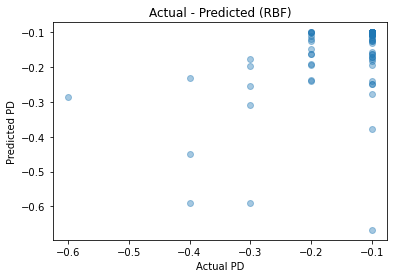

In [6]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (RBF)')
plt.show()

In [7]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.09274852835124595
MAE: 0.04276796231925197
